In [1]:
import dlib
import cv2
import os
import json
from tqdm import tqdm

from datetime import datetime 

In [2]:
train_frame_folder = 'train_sample_videos'
with open(os.path.join(train_frame_folder, 'metadata.json'), 'r') as file:
    data = json.load(file)
list_of_train_data = [f for f in os.listdir(train_frame_folder) if f.endswith('.mp4')]
detector = dlib.get_frontal_face_detector()

start = datetime.now()
for vid in tqdm(list_of_train_data):
    count = 0
    cap = cv2.VideoCapture(os.path.join(train_frame_folder, vid))
    frameRate = cap.get(5)
    while cap.isOpened():
        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                if data[vid]['label'] == 'REAL':
                    os.chdir(r"D:\Projects\Mtech Project\Datasets\deepfake-detection-challenge\dataset\real")
                    cv2.imwrite(vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                elif data[vid]['label'] == 'FAKE':
                    os.chdir(r"D:\Projects\Mtech Project\Datasets\deepfake-detection-challenge\dataset\fake")
                    cv2.imwrite(vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                
                os.chdir(r"D:\Projects\Mtech Project\Datasets\deepfake-detection-challenge")
                count+=1

end = datetime.now()

100%|████████████████████████████████████████████████████████████████████████████████| 405/405 [29:57<00:00,  4.44s/it]


In [3]:
os.chdir(r"D:\Projects\Mtech Project\Datasets\deepfake-detection-challenge")

In [6]:
print("Time required: ", end-start)

Time required:  0:29:57.382423


In [3]:
train_frame_folder = 'train_sample_videos'
with open(os.path.join(train_frame_folder, 'metadata.json'), 'r') as file:
    data = json.load(file)

In [6]:
real = 0
fake = 0
for i in data:
    if(data[i]['label'] == 'REAL'):
        real = real + 1
    else:
        fake = fake +1 

In [7]:
real, fake

(82, 324)

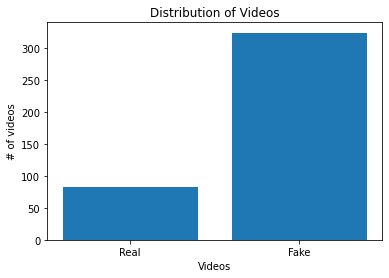

In [16]:
import matplotlib.pyplot as plt


plt.bar(["Real", "Fake"], [real, fake])
plt.title("Distribution of Videos")
plt.xlabel("Videos")
plt.ylabel("# of videos")
plt.show()